Copyright 2021 Takehiro Ajioka

### Enviroment

Python 3.6
Anaconda
tensorflow-gpu==1.15.0
keras==2.3.1
shap==0.36.0
tfdeterminism==0.3.0

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from scipy import io
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, ConvLSTM2D, Bidirectional
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, roc_auc_score

In [2]:
# Allow grouth option of GPU
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [3]:
# Load data
signal = io.loadmat('../data/signal_5mice.mat')
runrest = io.loadmat('../data/runrest_5mice.mat')

In [4]:
plt.rcParams["font.size"] = 18

# Preprocess

In [5]:
# Mini-max normalization
def mini_max(dataset):
    min_value = dataset.min(axis=0)
    max_value = dataset.max(axis=0)
    dataset_nor = (dataset - min_value) / (max_value - min_value)
    return dataset_nor

In [6]:
# Create input data [-n,n+1]
def create_dataset(dataset, look_frame):
    dataX, dataY = [], []
    for i in range(look_frame,len(dataset)-(look_frame)):
        xset = []
        for j in range(dataset.shape[1]-1):
            a = dataset[(i-look_frame):(i+look_frame+1), j]
            xset.append(a)
        dataY.append(dataset[i, -1])      
        dataX.append(xset)
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
look_frame = 15 #read the previous and next n frames as input

def Data_preprocess(signal, runrest):
    # Normalize
    signal = mini_max(signal.transpose())
    runrest = runrest.transpose()
    # Create dataset
    dataset = numpy.hstack([signal.astype('float32'), runrest.astype('float32')])
    X, Y = create_dataset(dataset, look_frame)
    return X, Y

In [8]:
def Get_Dataset(TRAIN, VALID, TEST):
    
    # Training dataset
    print('TRAINING')
    trainX = numpy.empty([0,50,31], dtype=numpy.float32)
    trainY = numpy.empty(0, dtype=numpy.float32)
    for i in TRAIN:
        print(f'Mouse {i}')
        for j in range(signal['signal'+str(i)].shape[1]):
            X, Y = Data_preprocess(signal['signal'+str(i)][0,j], runrest['runrest'+str(i)][0,j])
            trainX = numpy.concatenate([trainX, X], axis=0)
            trainY = numpy.concatenate([trainY, Y], axis=0)

    # Validation dataset
    print('VALIDATION')
    validX = numpy.empty([0,50,31], dtype=numpy.float32)
    validY =numpy.empty(0, dtype=numpy.float32)
    for i in VALID:
        print(f'Mouse {i}')
        for j in range(signal['signal'+str(i)].shape[1]):
            X, Y = Data_preprocess(signal['signal'+str(i)][0,j], runrest['runrest'+str(i)][0,j])
            validX = numpy.concatenate([validX, X], axis=0)
            validY = numpy.concatenate([validY, Y], axis=0)

    return trainX, validX, trainY, validY

# Training

In [9]:
from Training_code_behavior import Learn_model

In [10]:
Models = ['LSTM', 'RNN', 'BiLSTM', 'BiGRU', 'BiRNN']

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 1
LSTM


Using TensorFlow backend.
TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


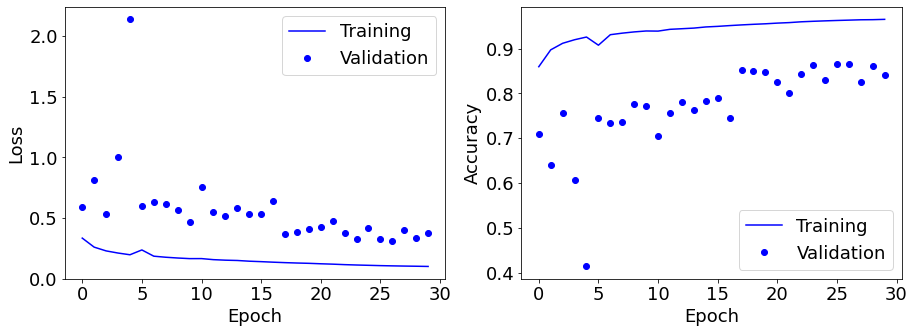

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


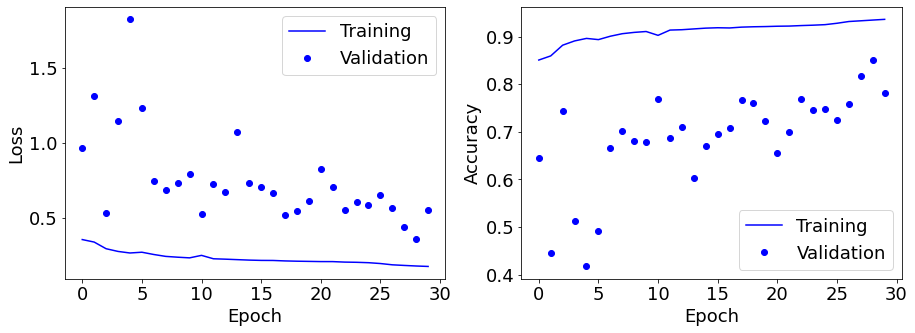

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


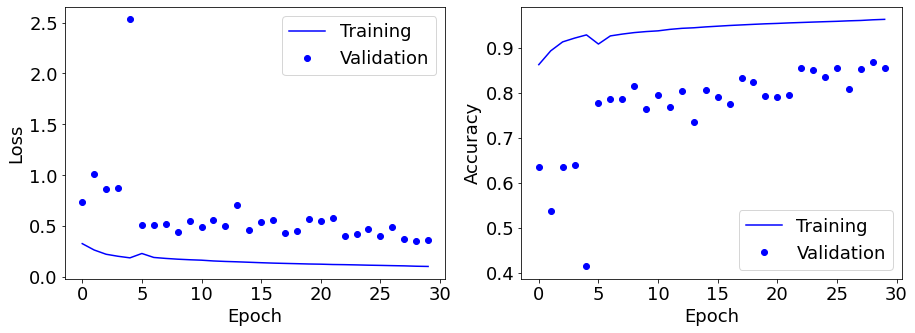

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


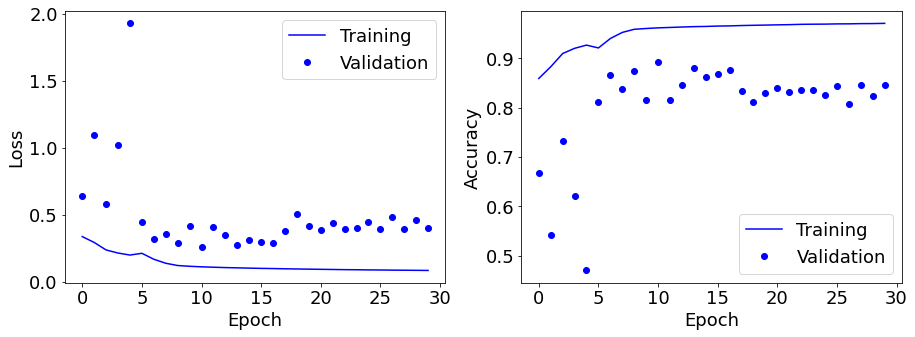

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


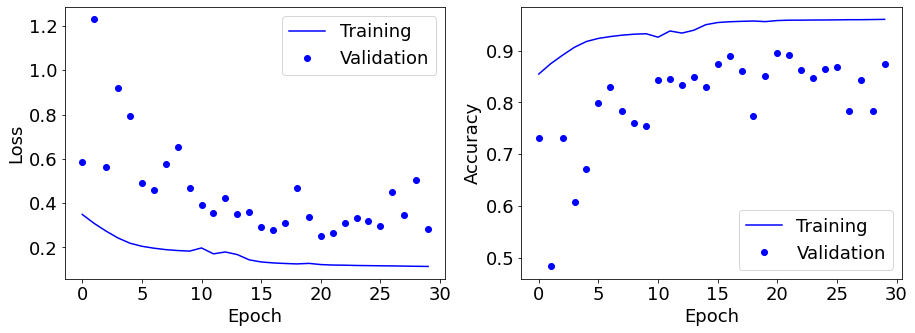

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 1
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


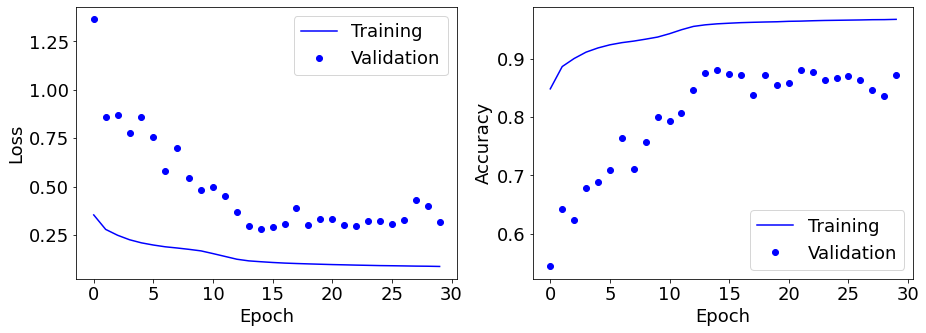

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


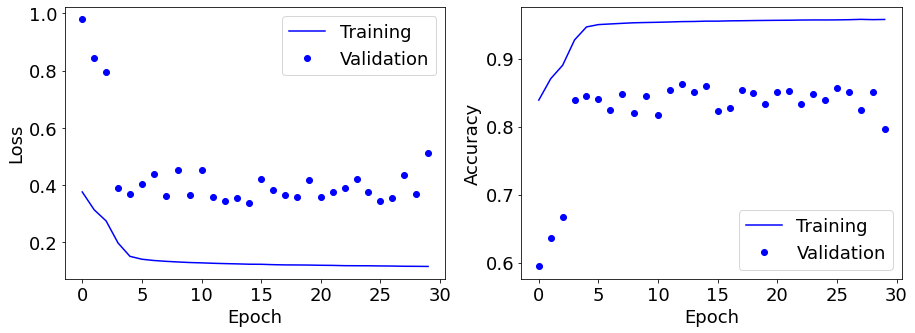

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


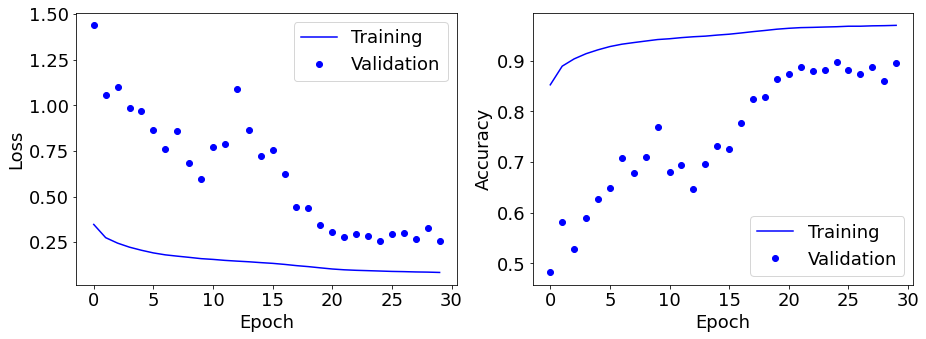

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


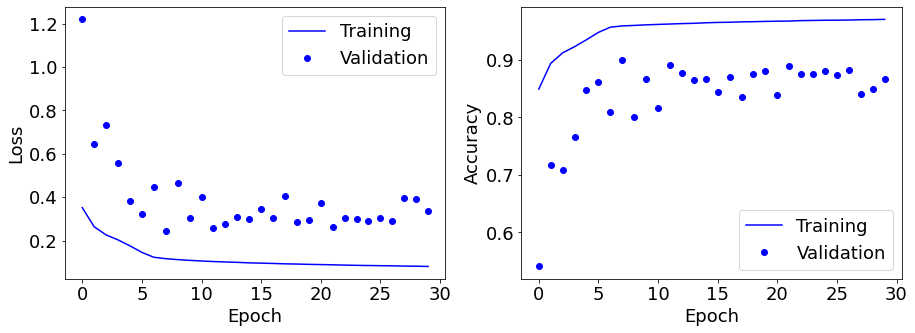

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


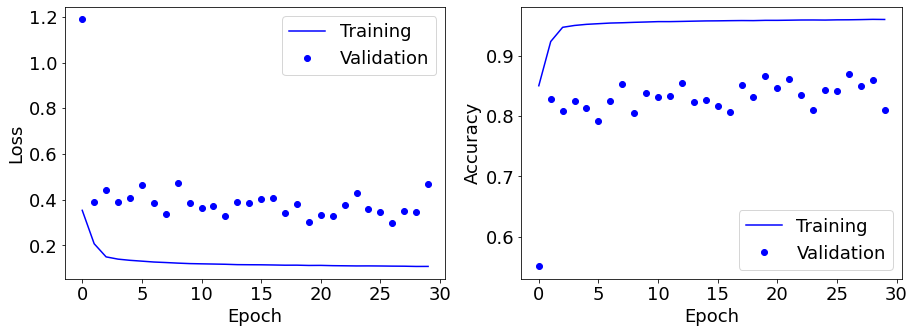

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 1
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


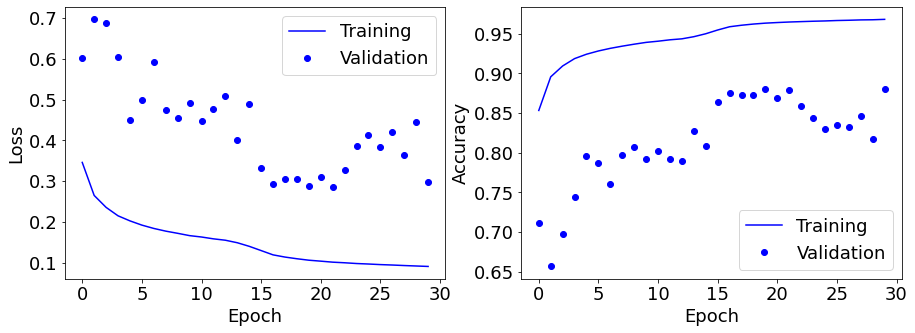

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


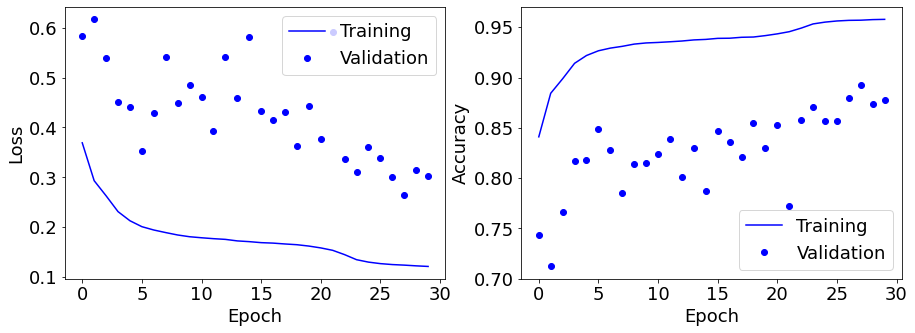

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


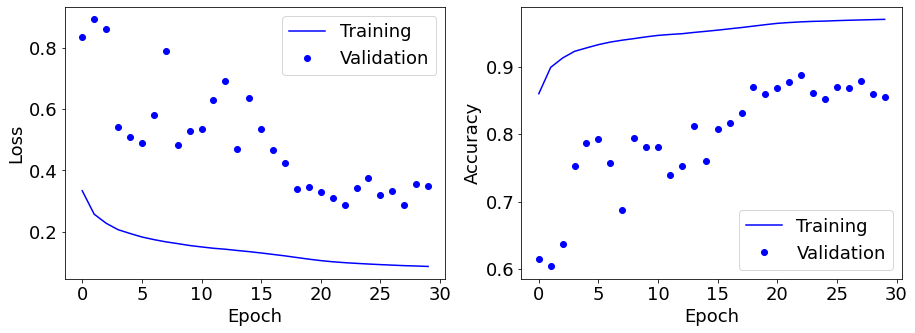

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


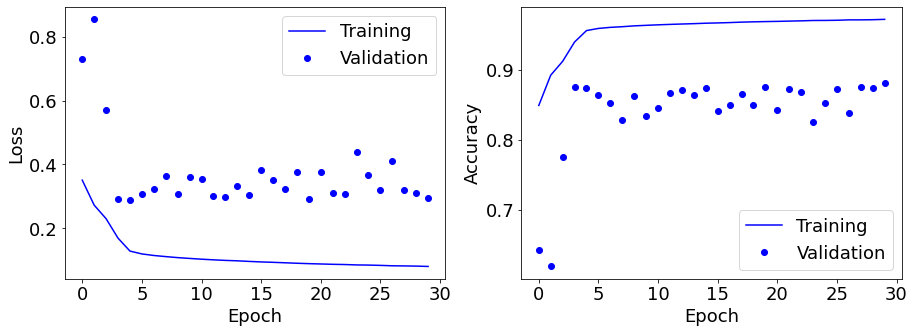

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


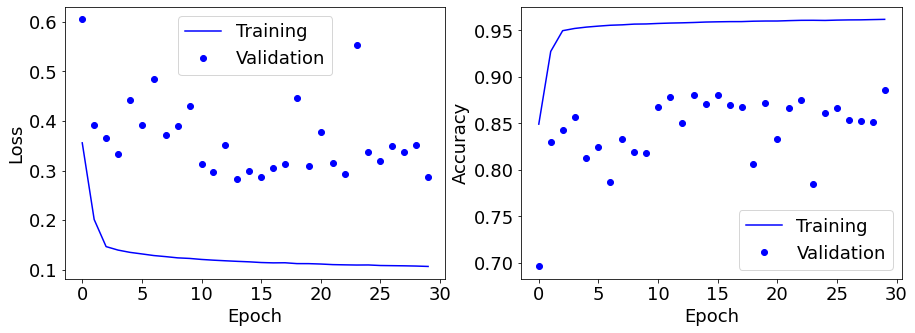

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 1
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


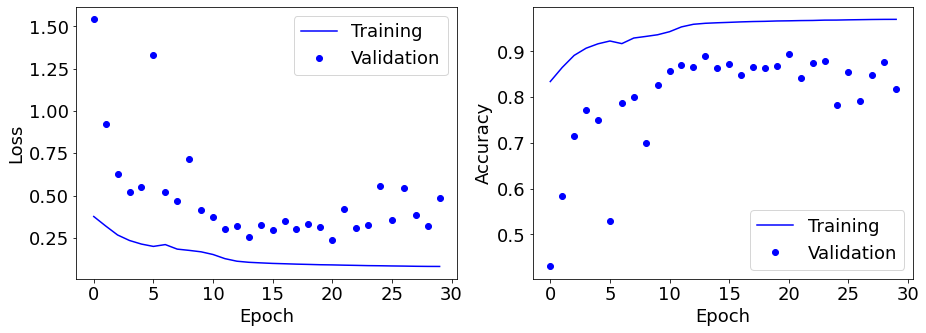

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


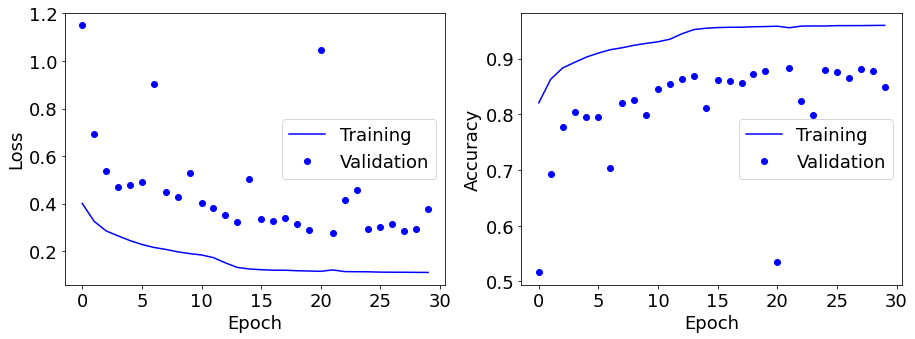

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


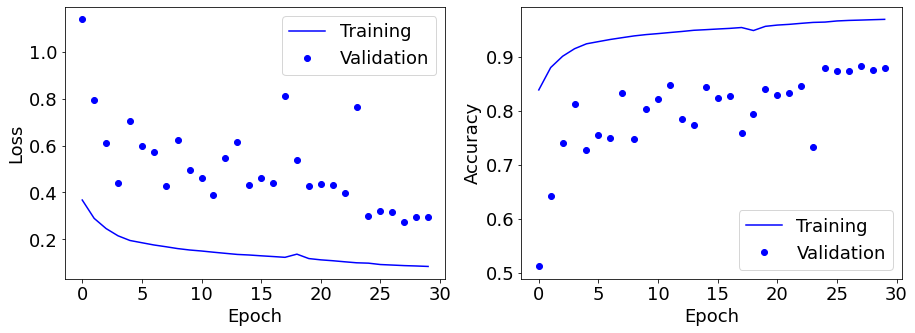

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


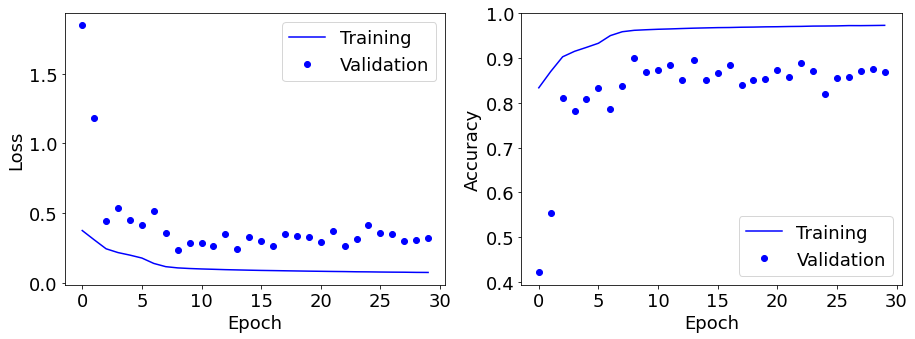

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


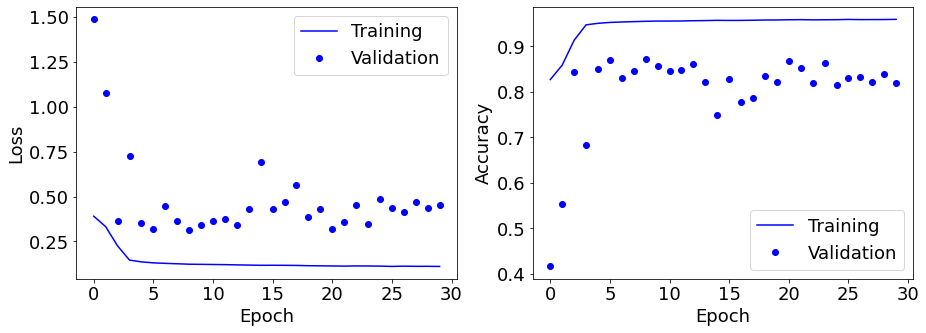

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 2
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


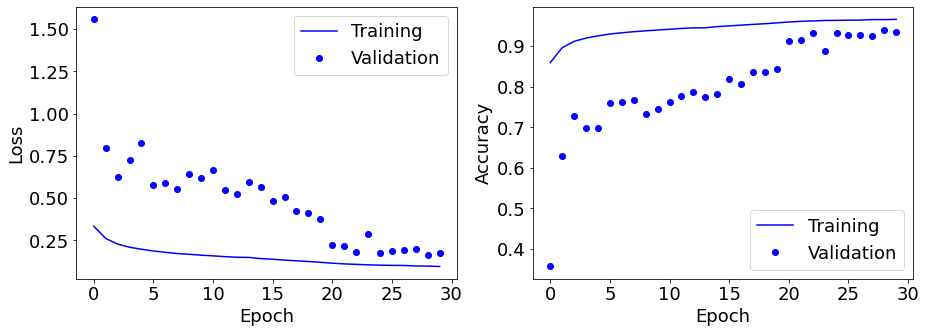

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


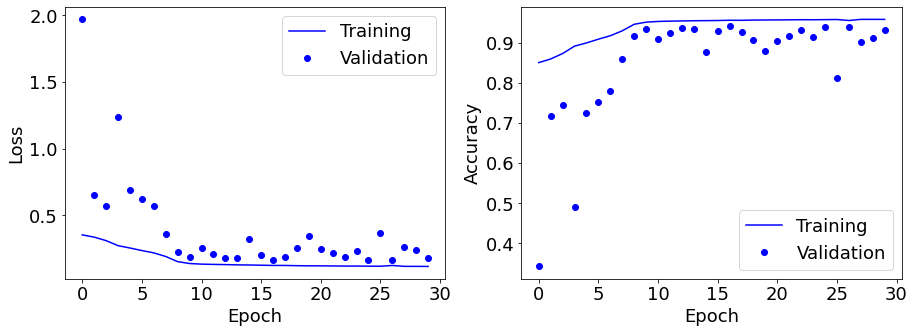

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


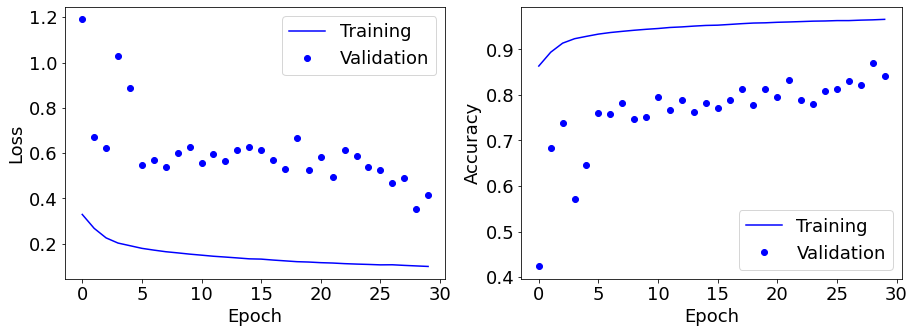

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


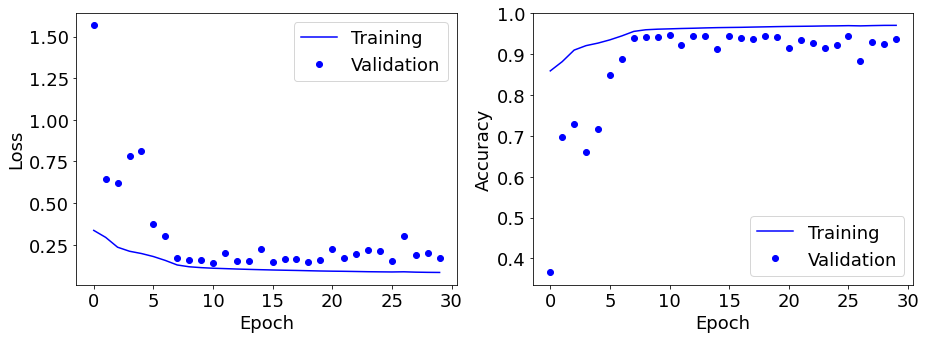

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


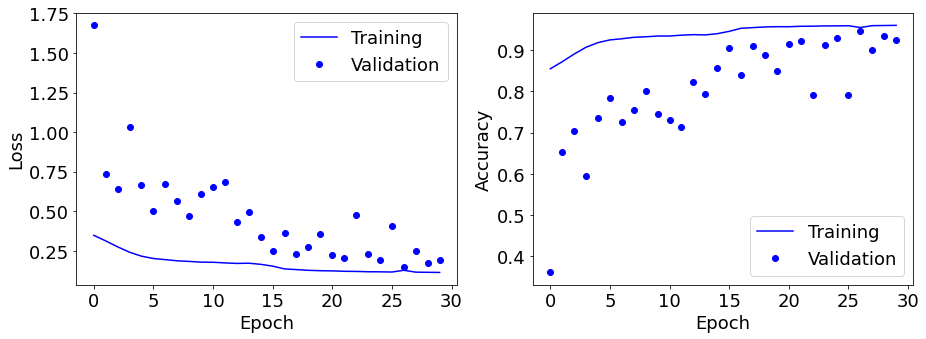

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 2
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


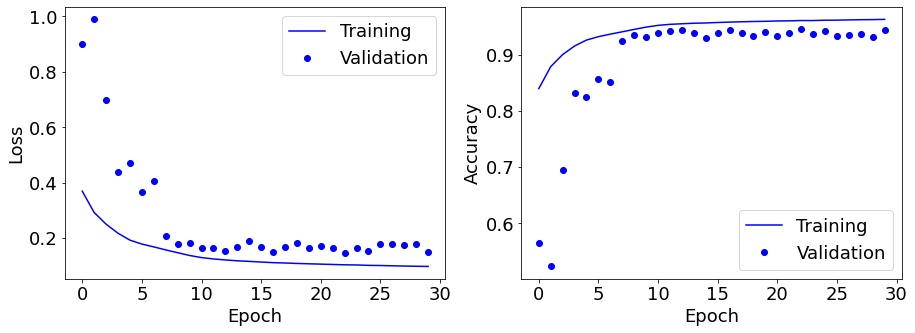

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


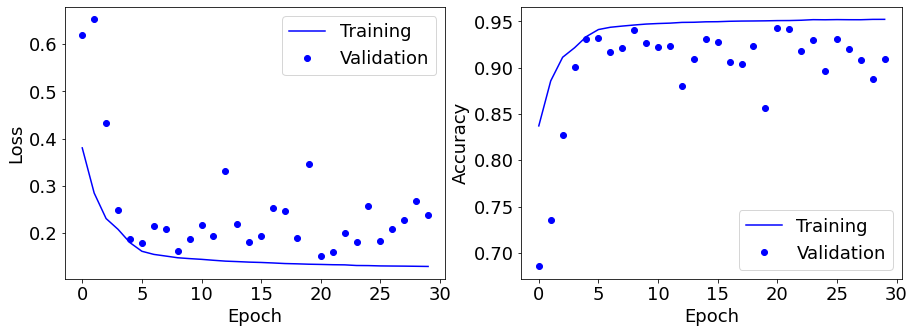

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


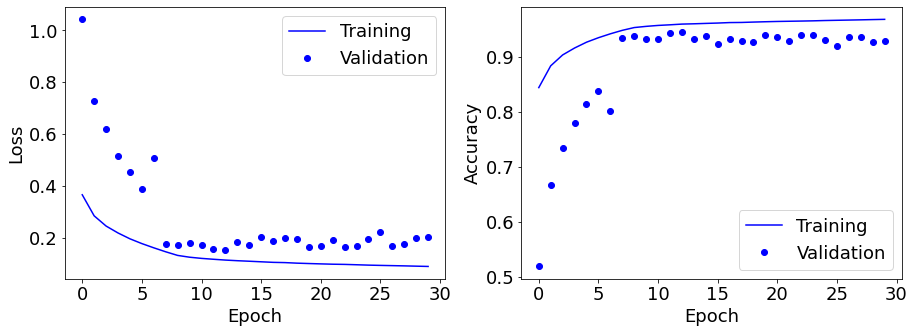

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


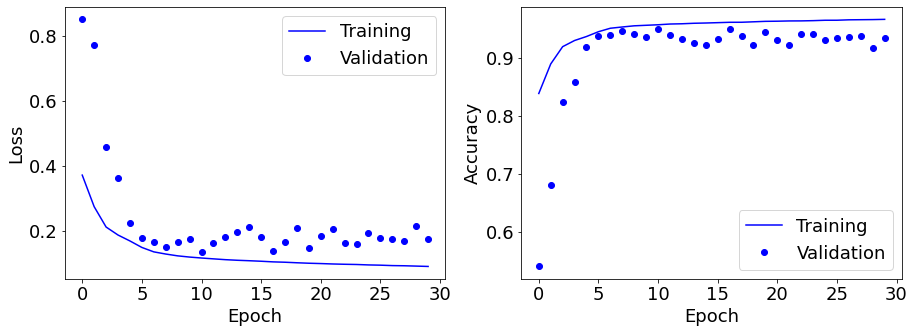

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


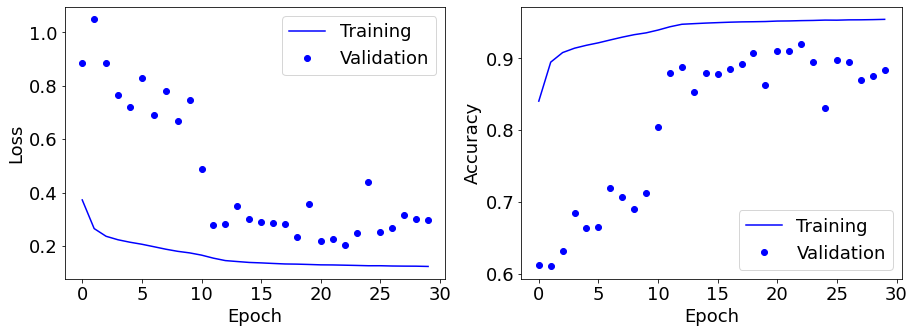

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 2
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


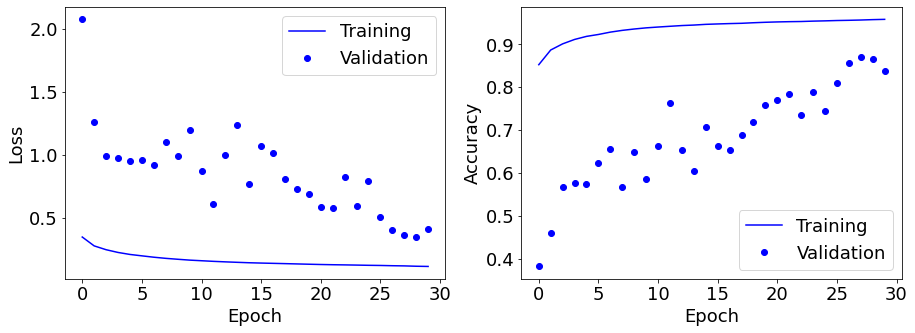

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


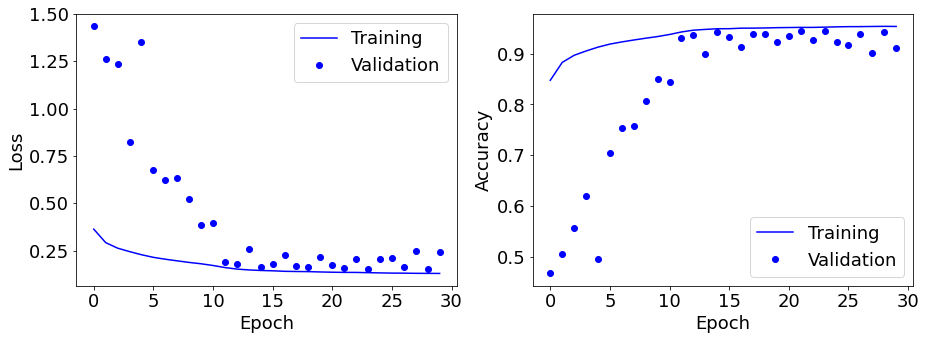

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


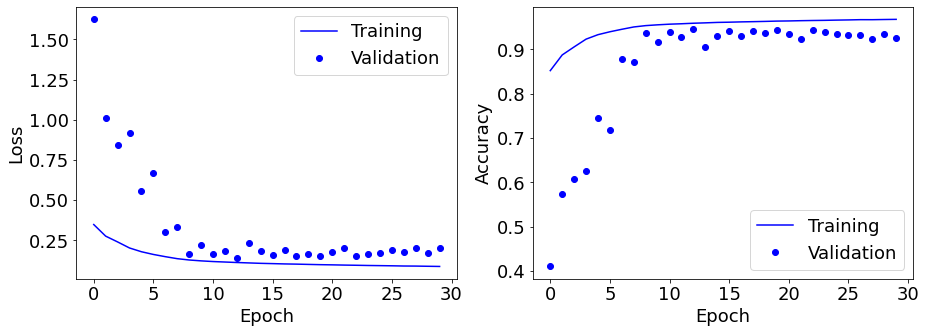

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


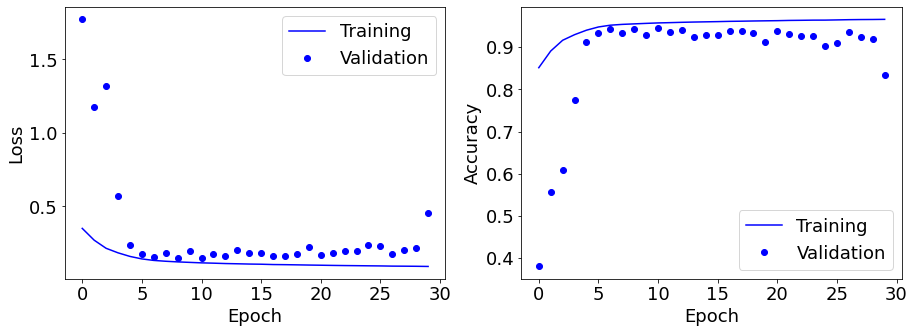

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


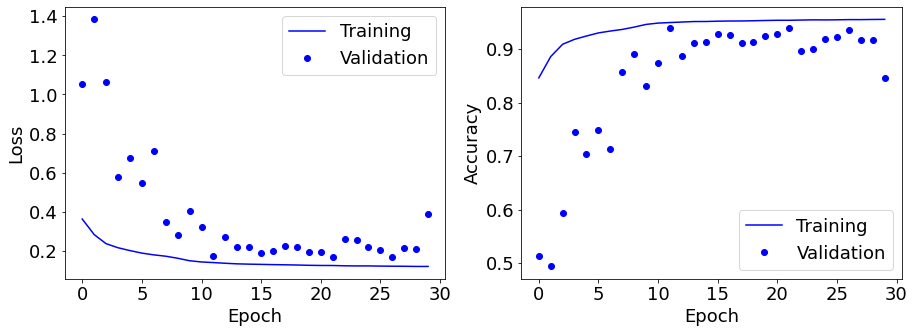

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 2
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


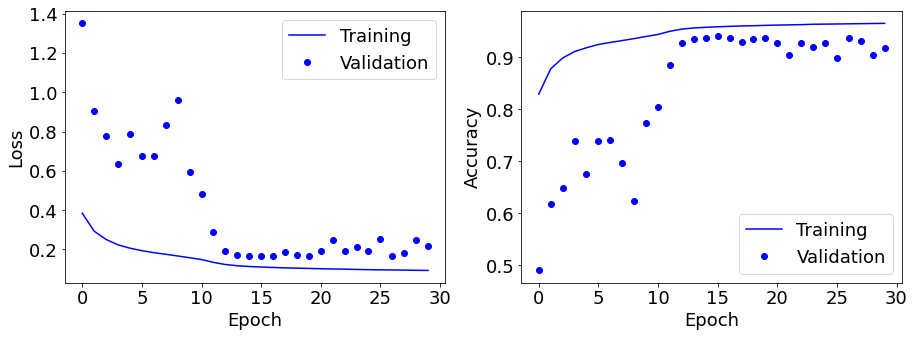

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


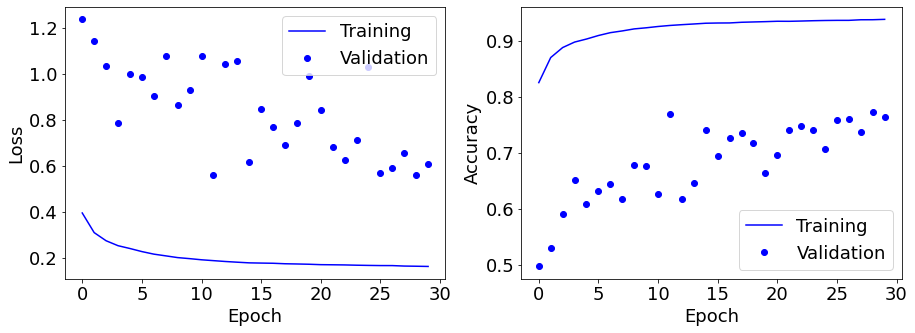

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


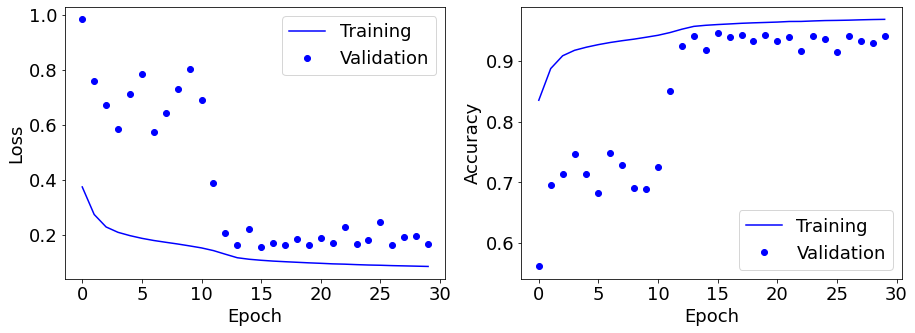

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


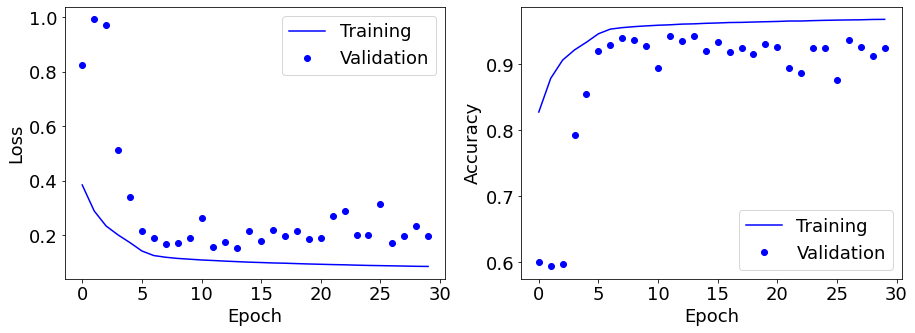

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


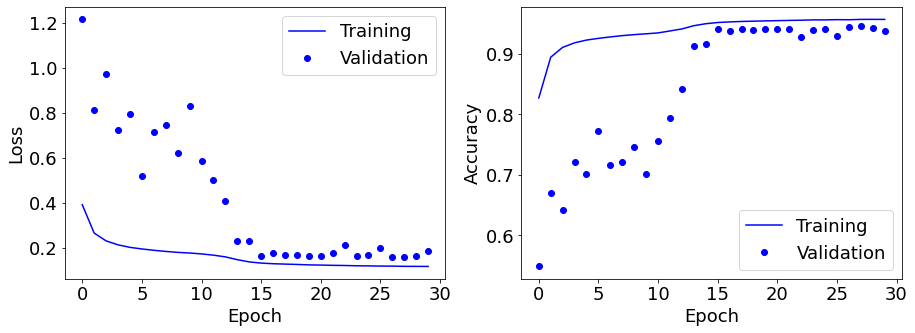

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 3
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


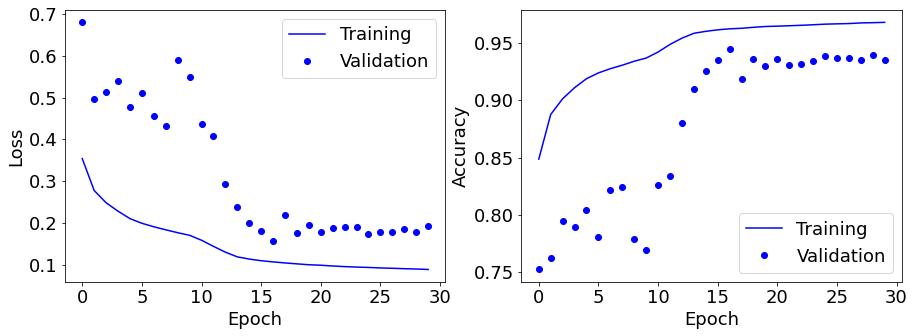

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


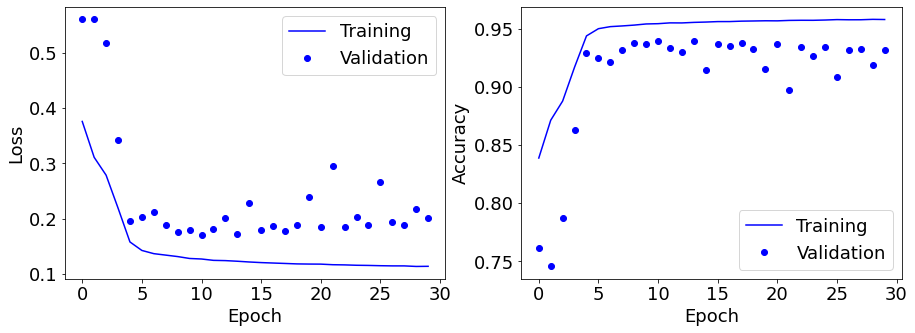

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


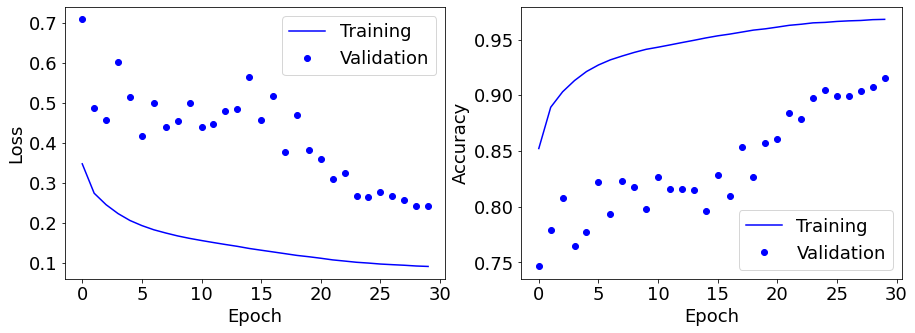

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


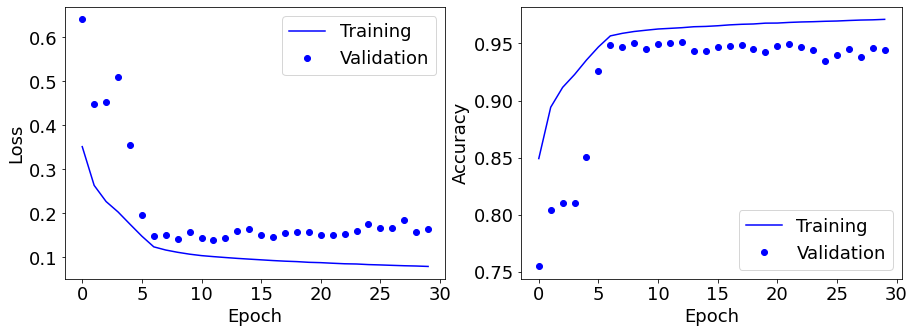

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


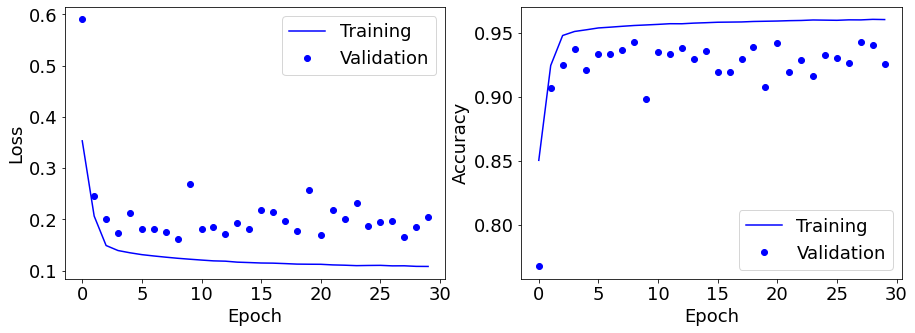

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 3
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


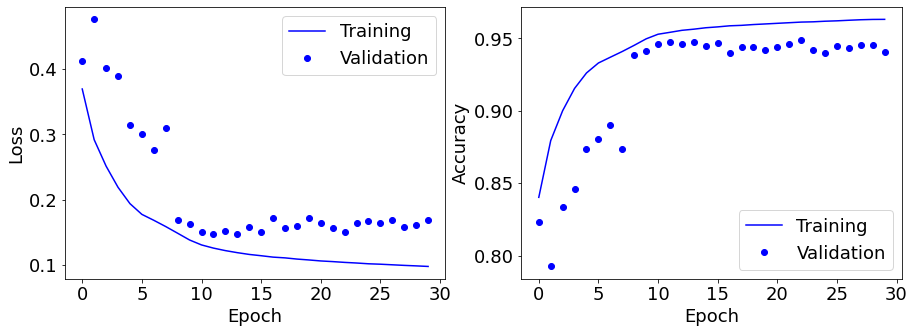

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


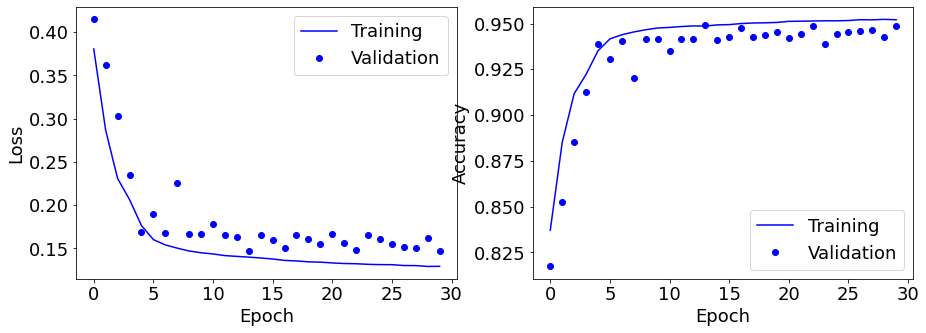

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


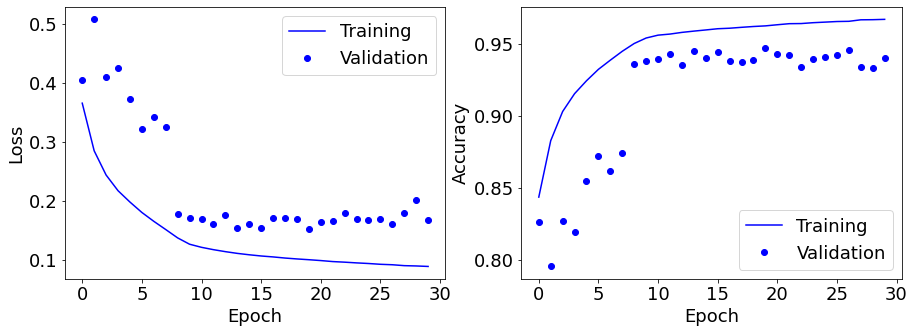

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


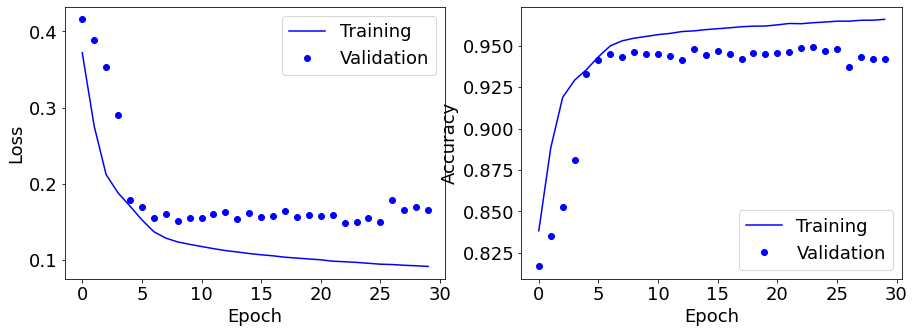

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


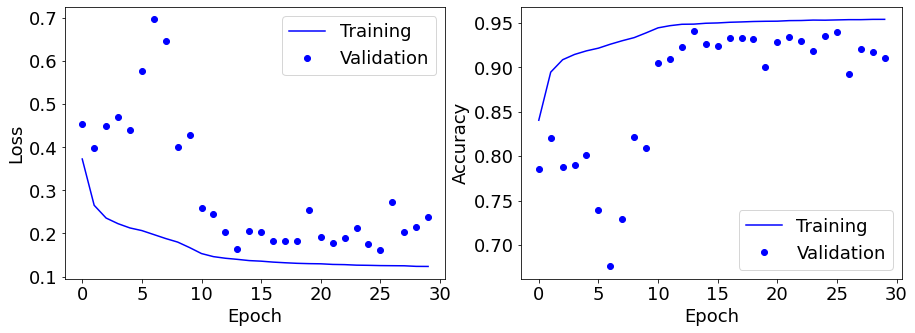

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 3
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


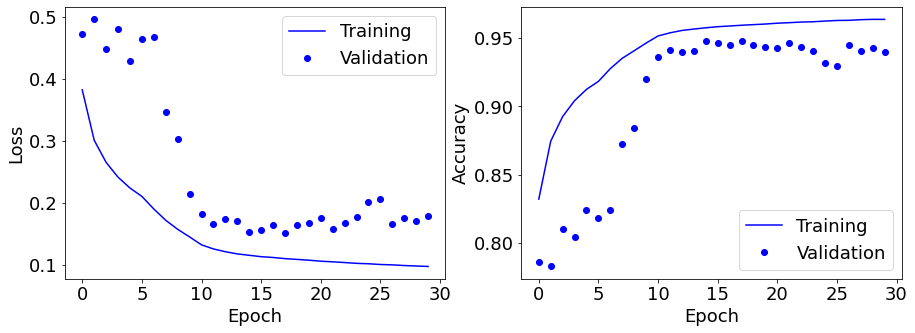

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


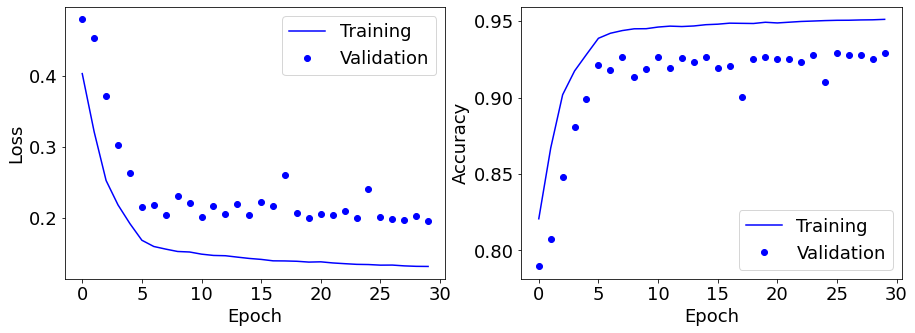

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


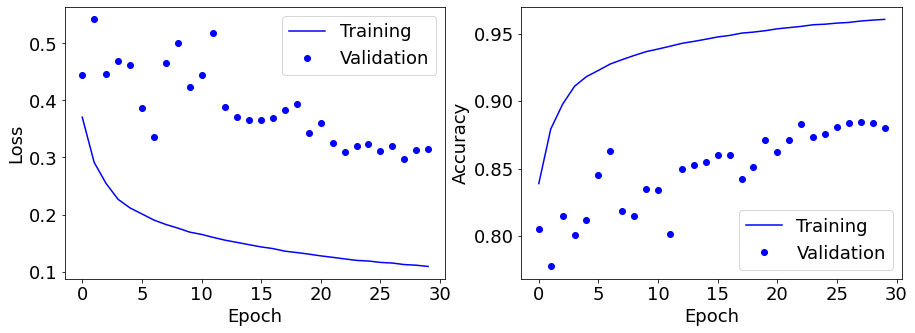

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


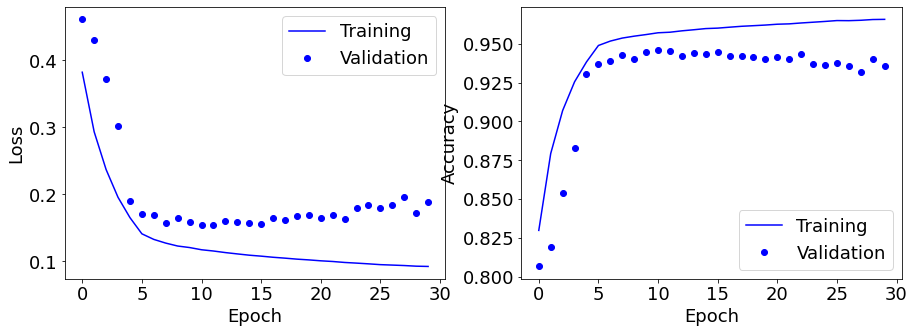

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


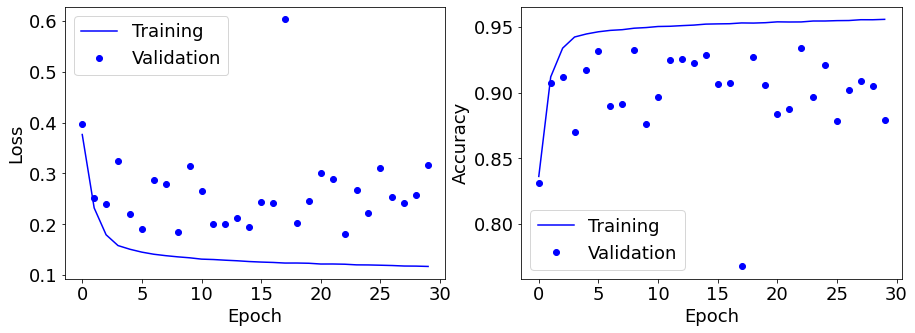

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 3
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


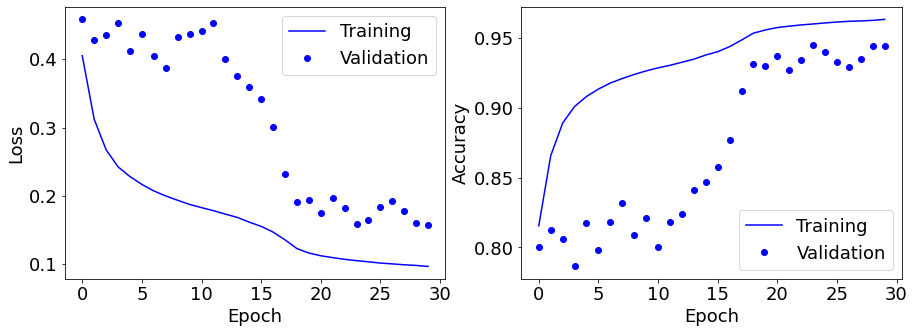

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


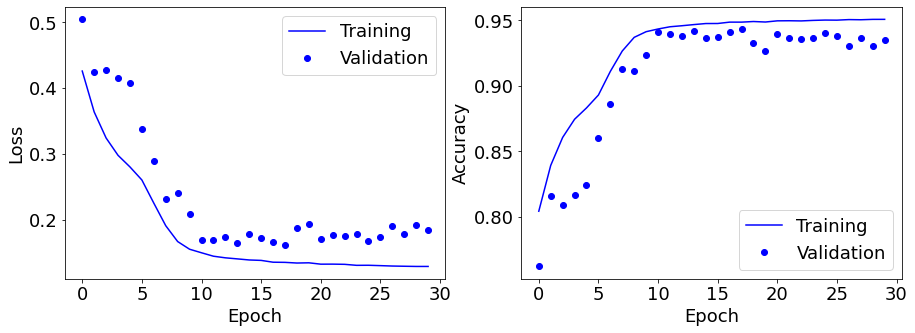

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


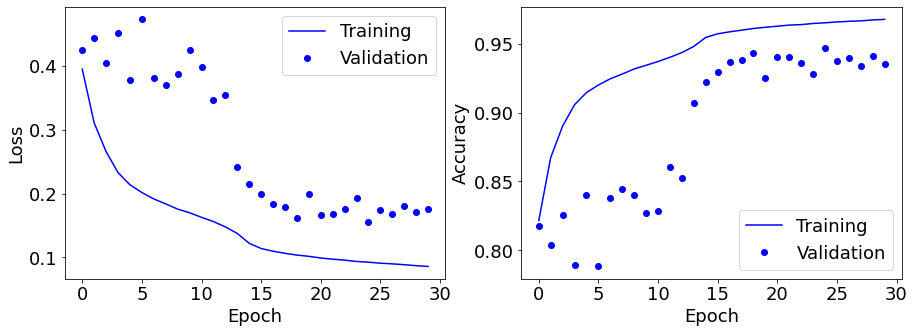

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


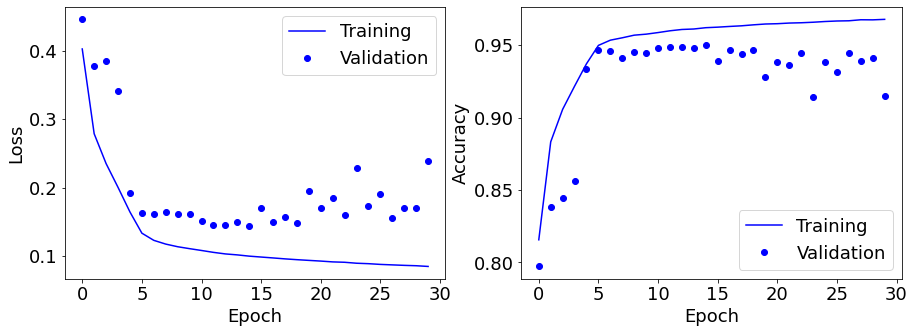

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


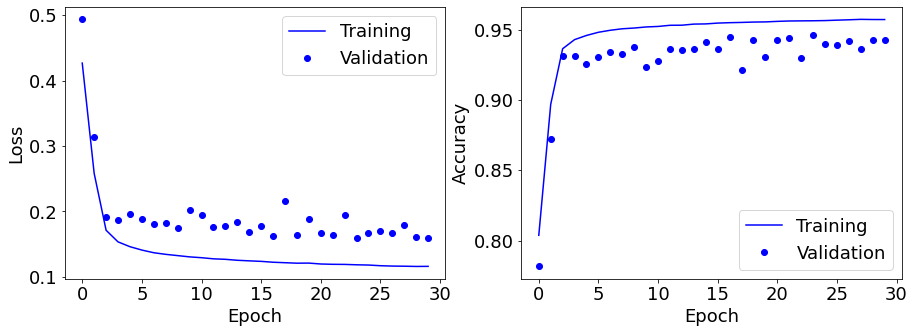

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 4
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


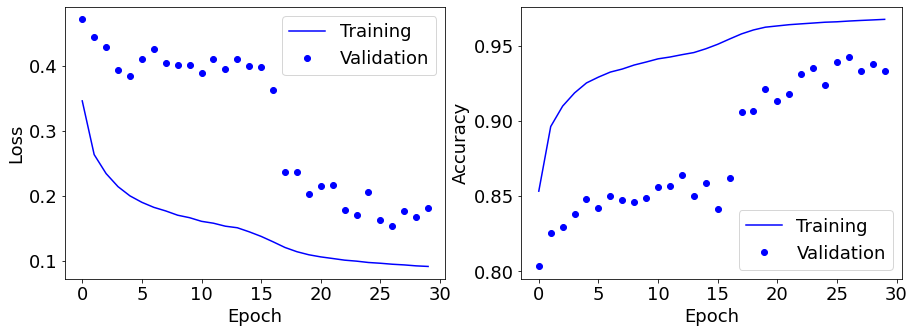

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


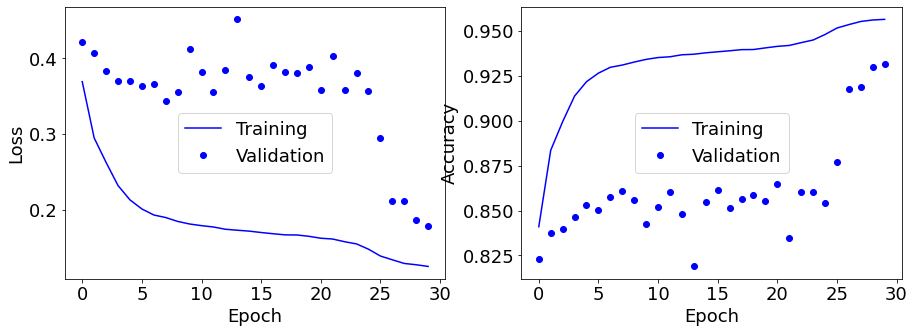

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


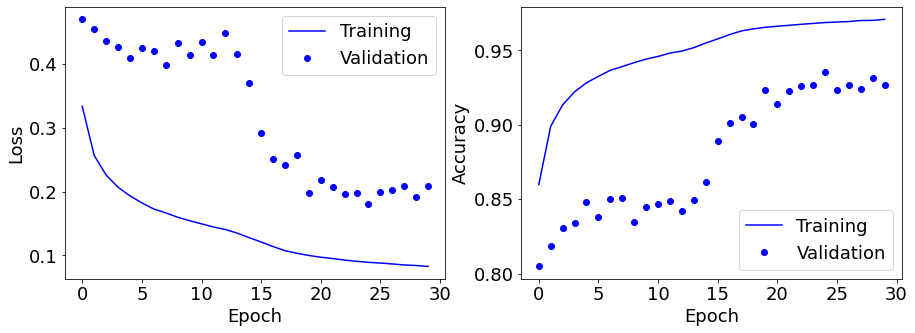

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


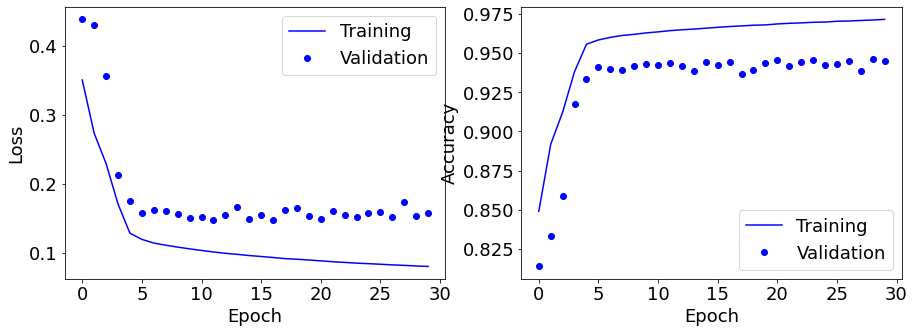

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


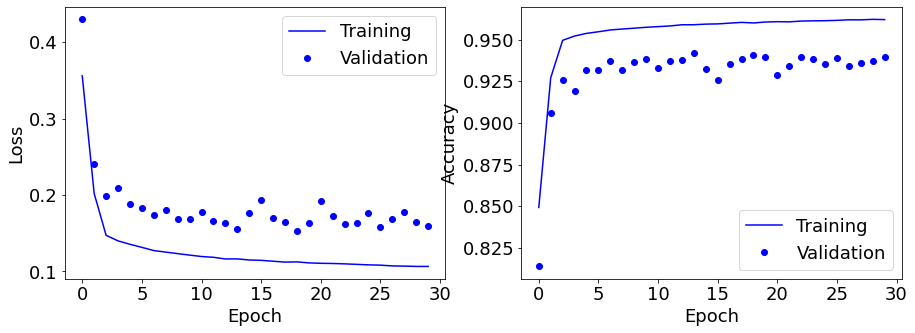

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 4
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


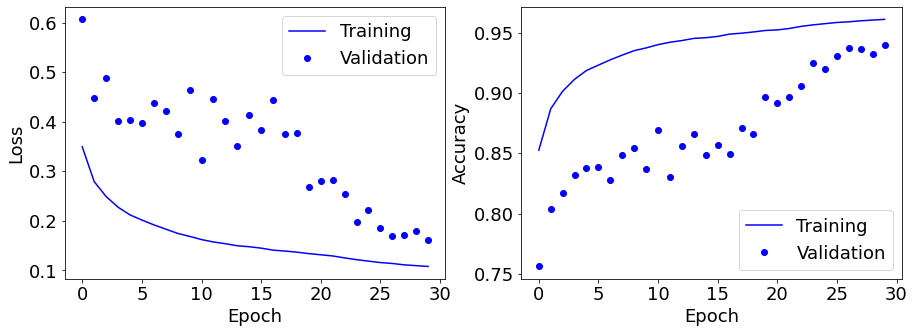

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


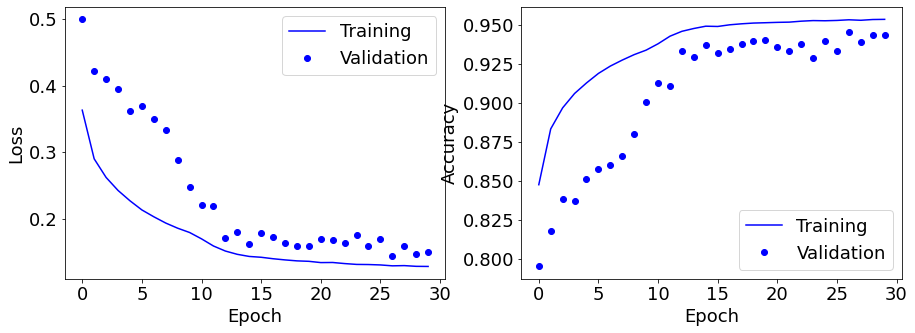

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


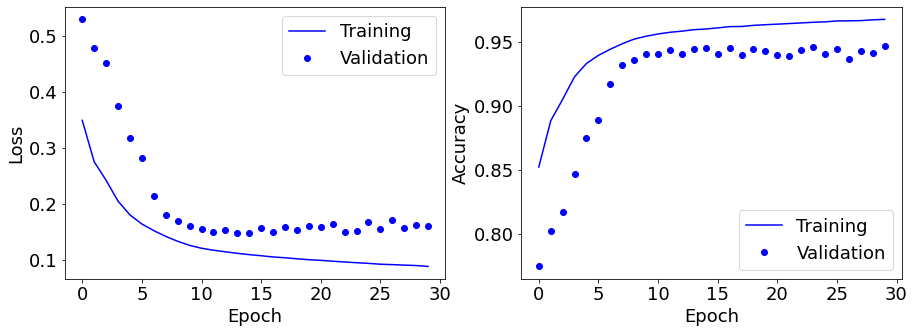

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


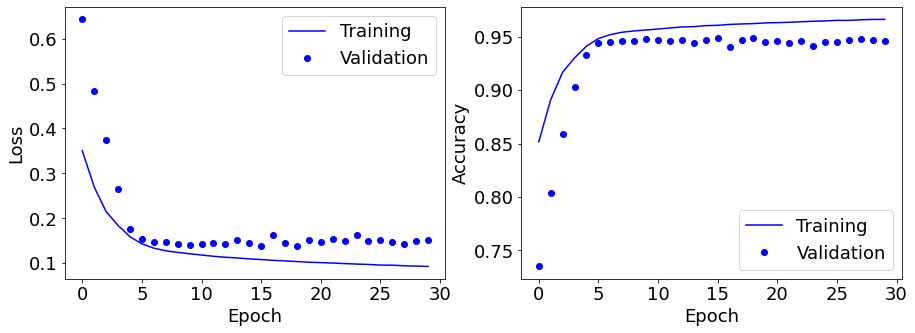

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


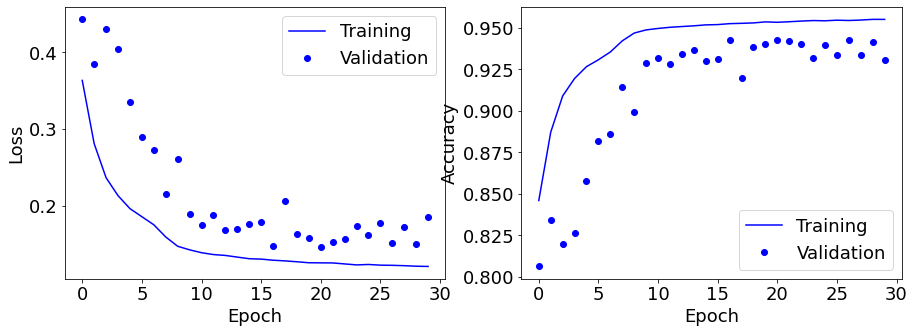

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 4
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


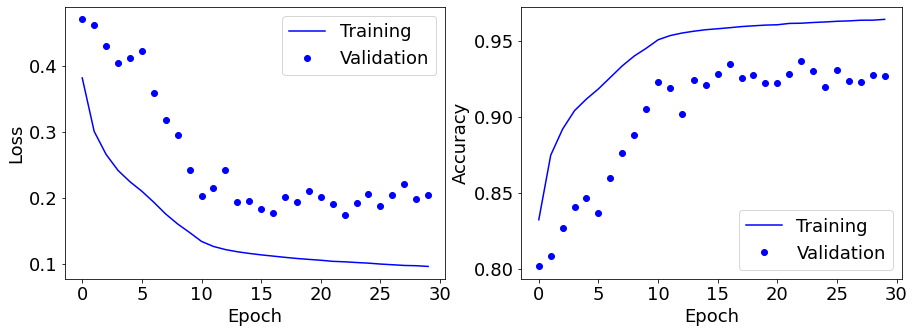

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


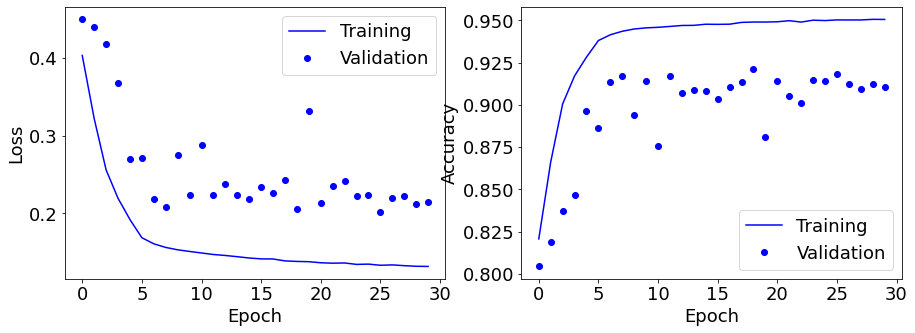

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


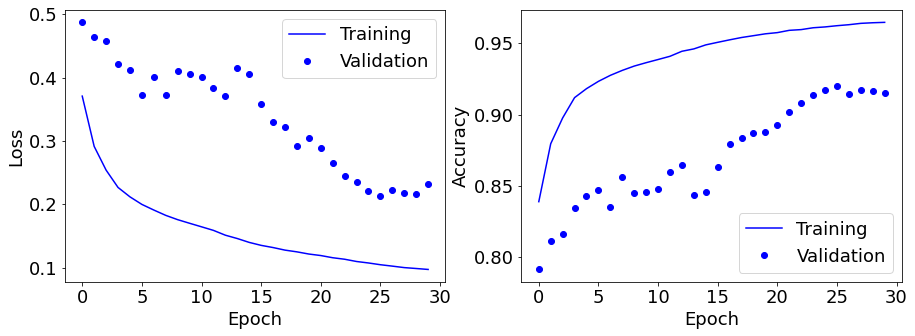

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


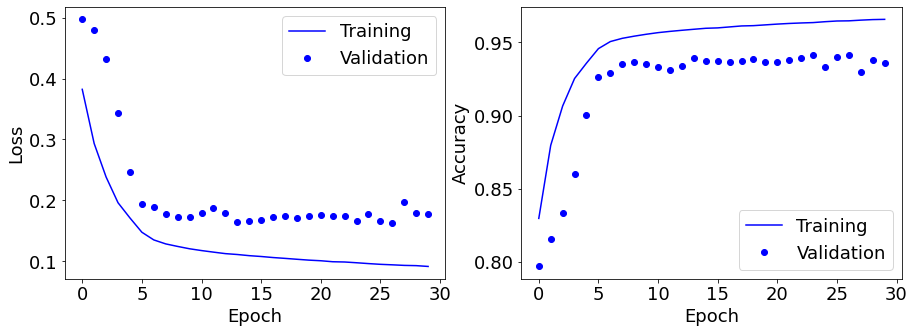

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


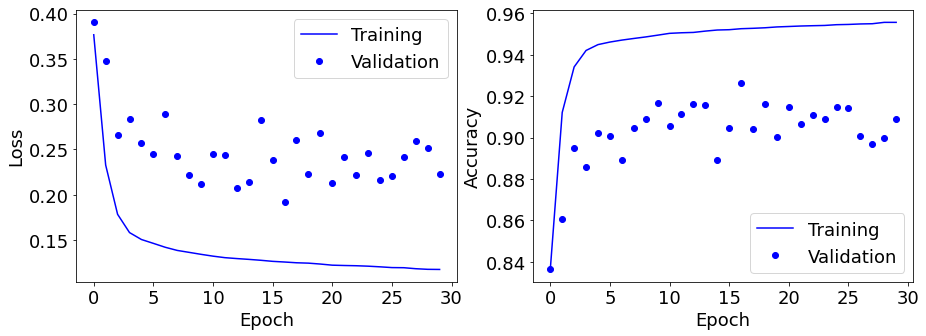

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 4
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


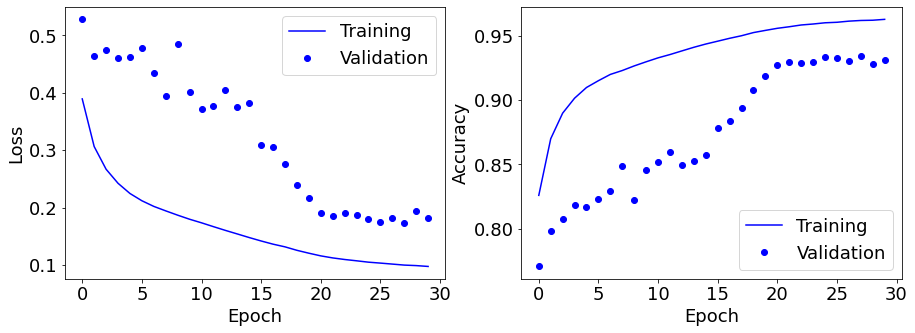

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


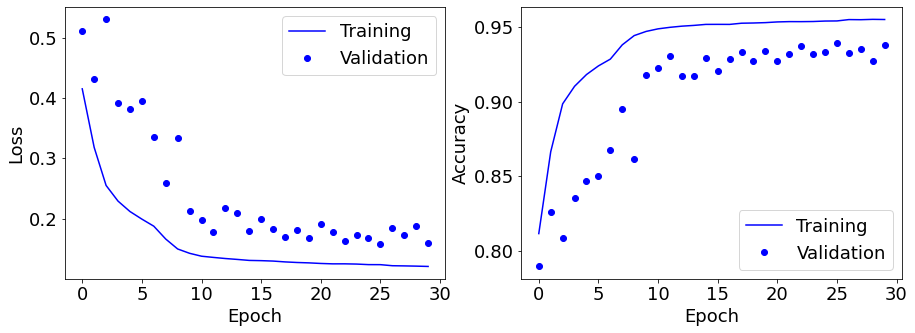

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


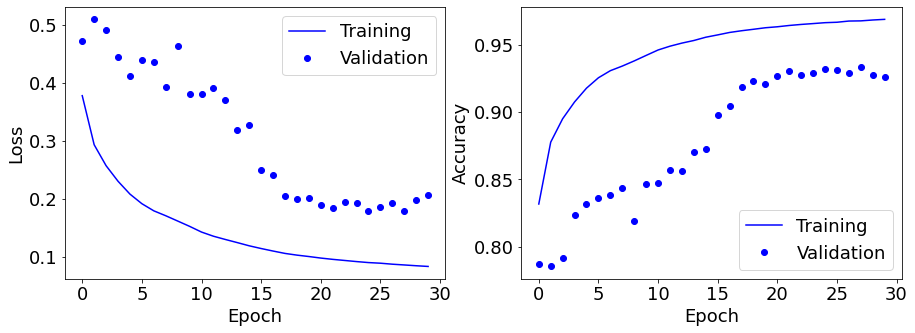

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


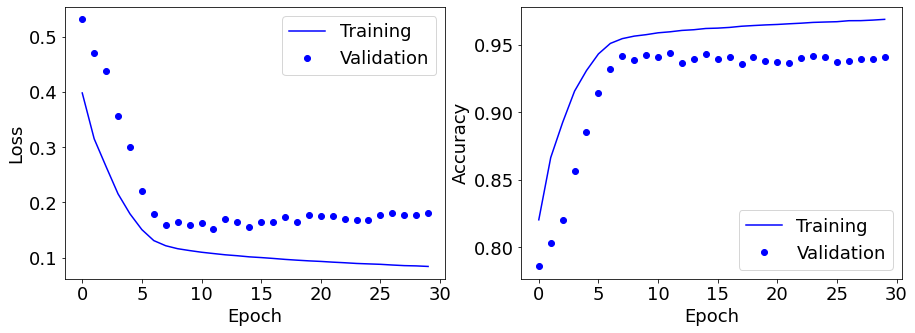

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


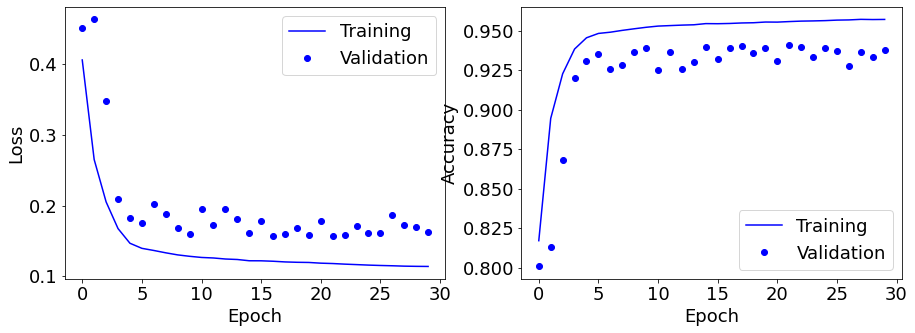

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 5
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


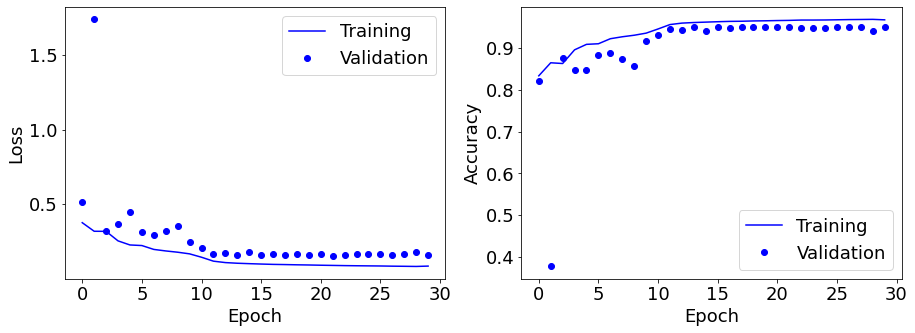

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


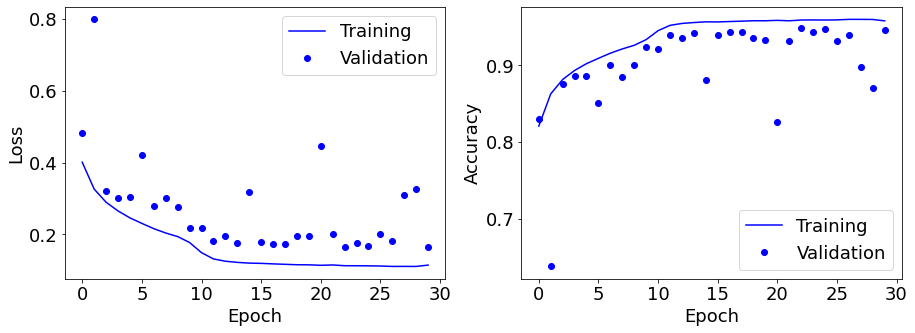

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


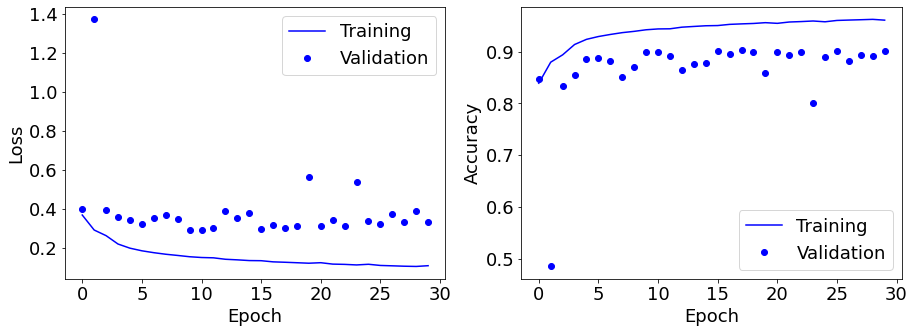

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


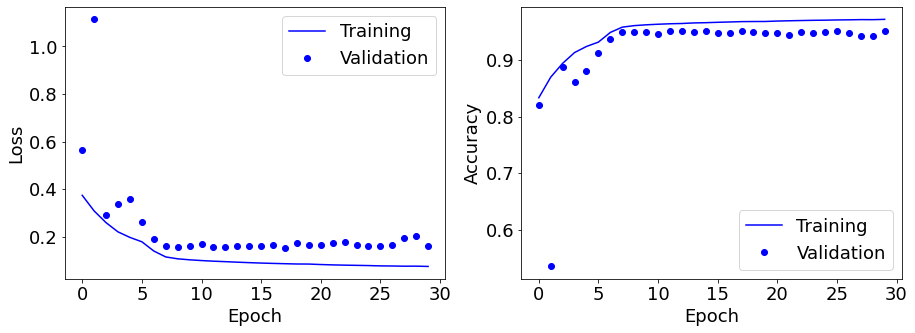

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


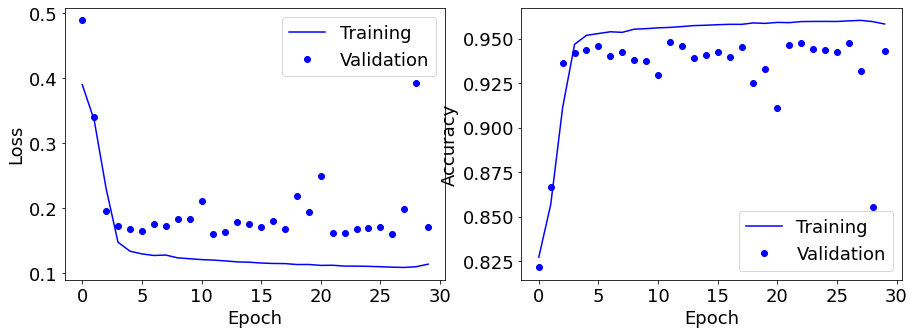

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 5
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


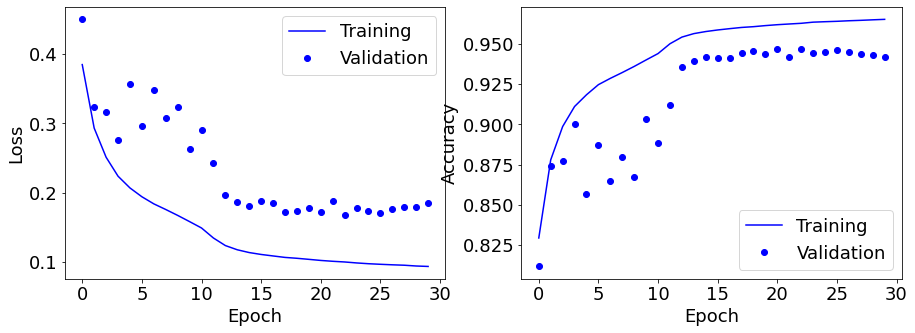

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


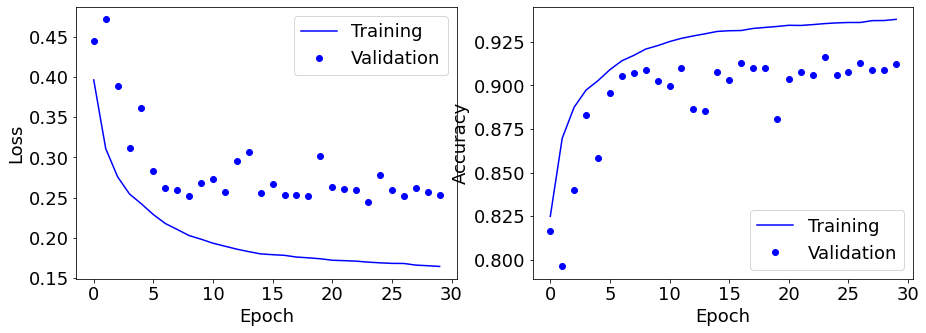

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


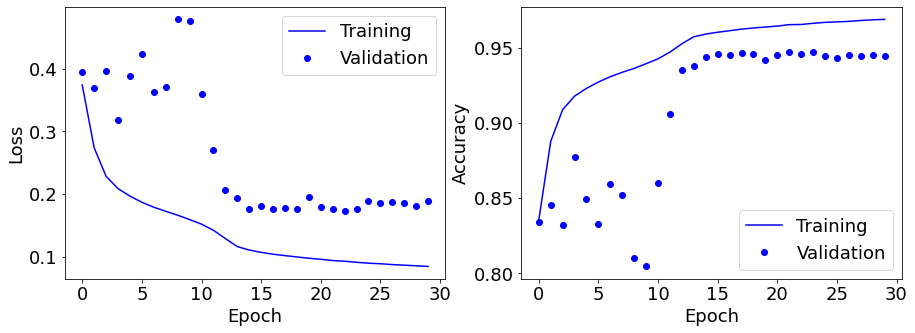

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


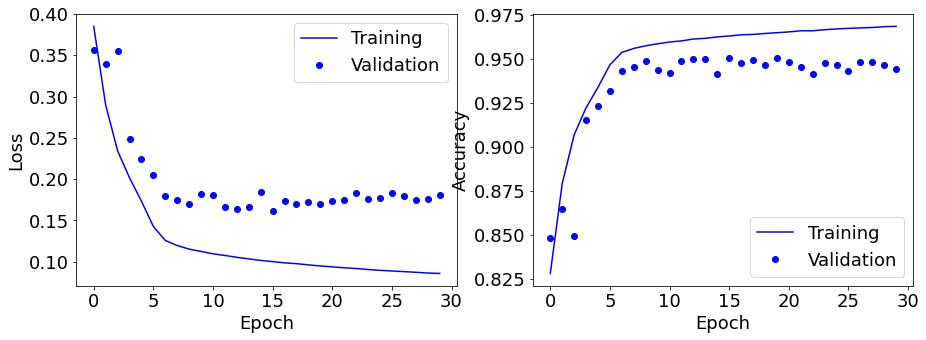

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


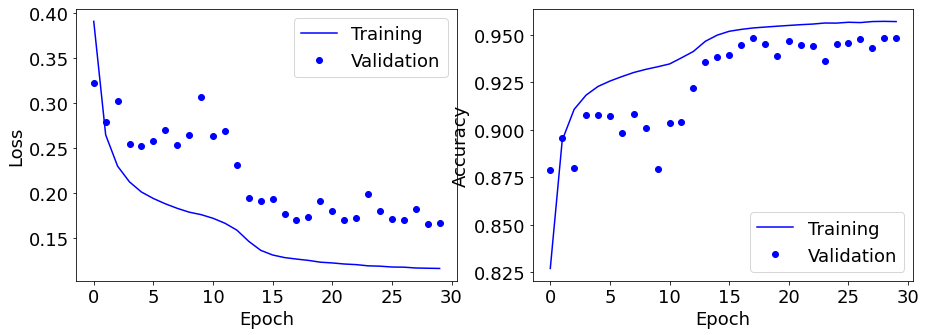

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 5
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


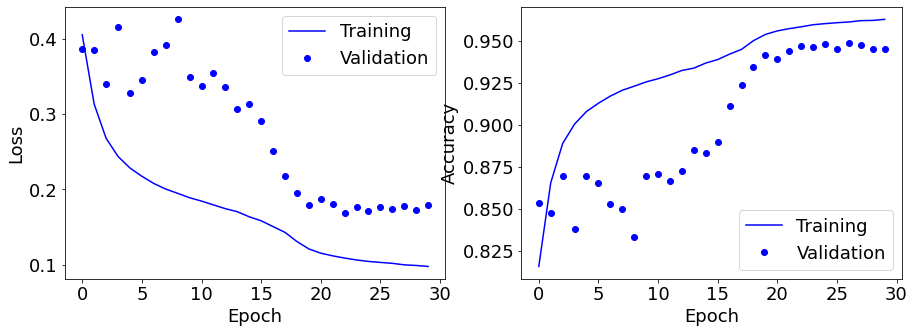

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


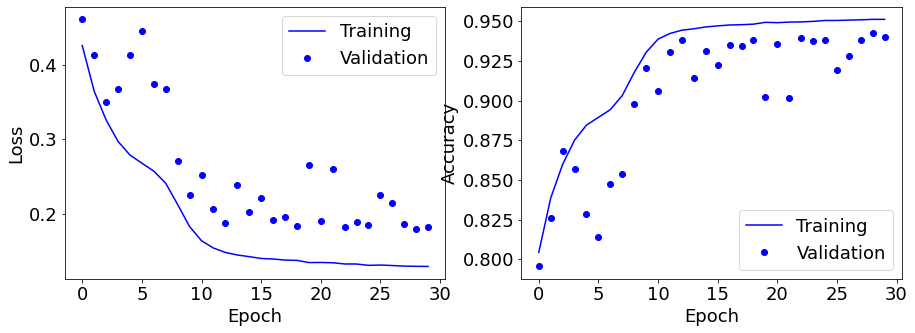

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


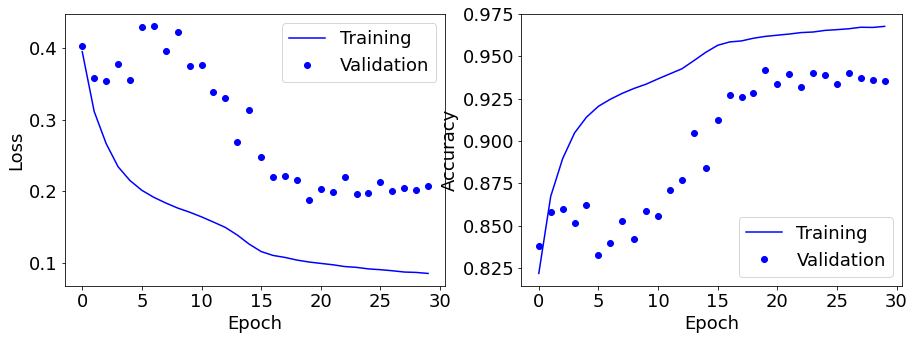

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


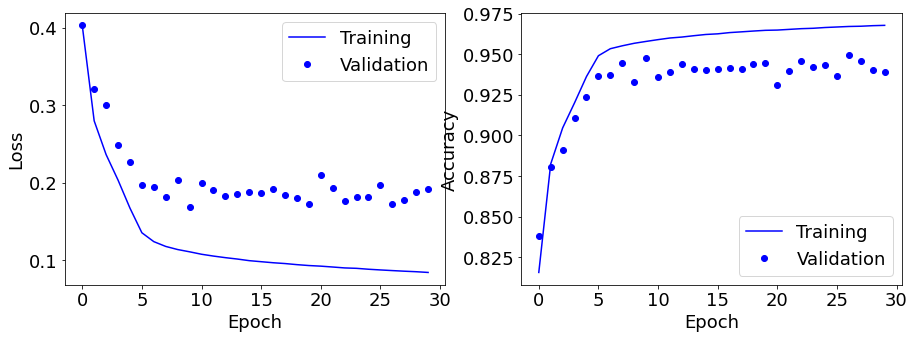

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


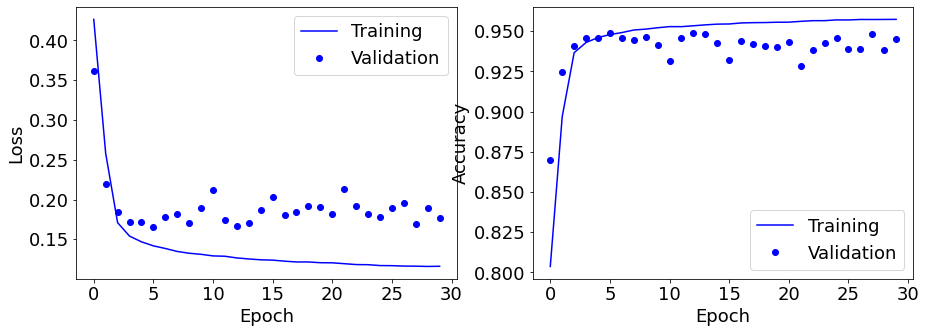

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 5
LSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


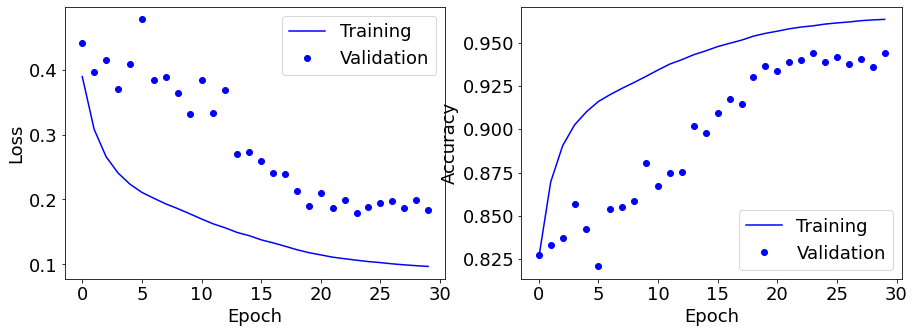

RNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


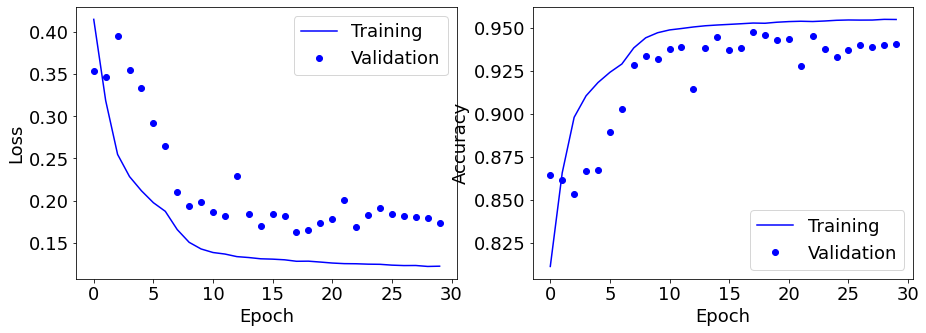

BiLSTM


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


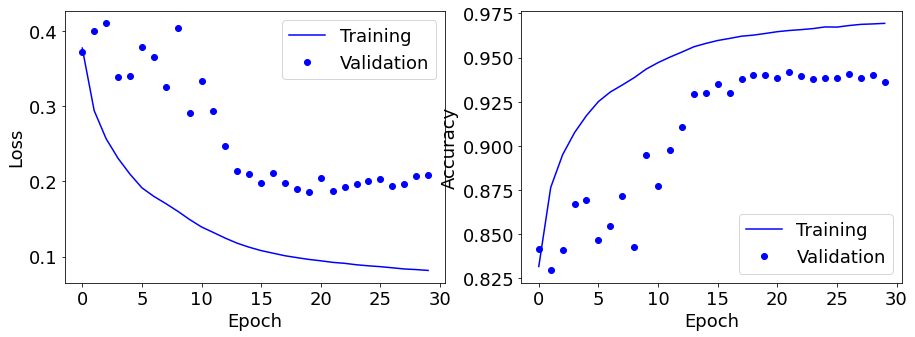

BiGRU


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


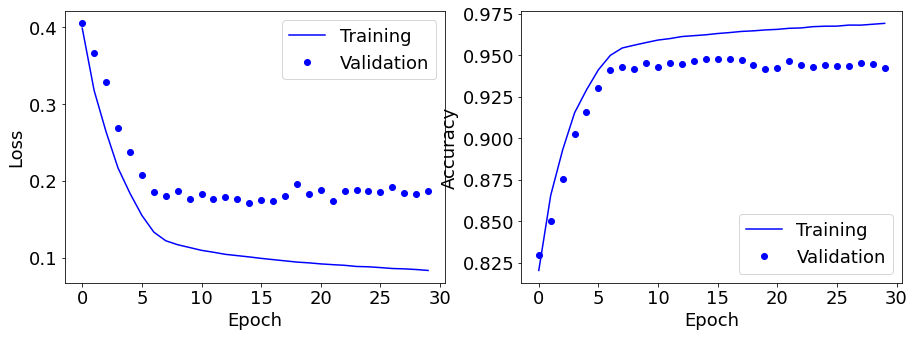

BiRNN


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


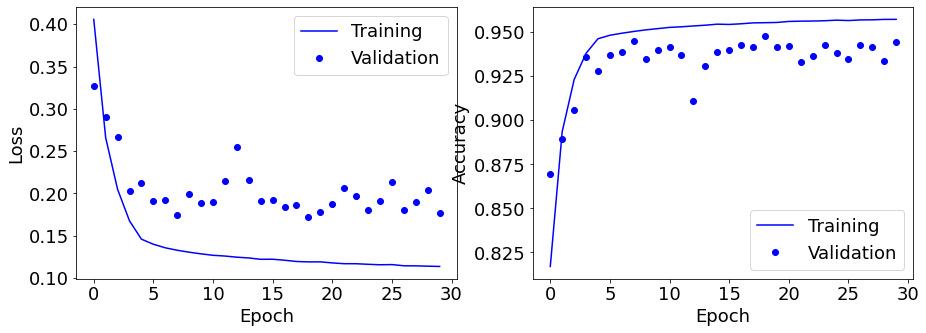

In [11]:
import itertools
l = [1, 2, 3, 4, 5]
for v in itertools.permutations(l, 2):
    TRAIN = [i for i in l if i not in v]
    VALID = [v[0]]
    TEST = [v[1]]
    trainX, validX, trainY, validY = Get_Dataset(TRAIN, VALID, TEST)
    for ModelType in Models:
        print(ModelType)
        ver = f'{ModelType}_{VALID}_{TEST}'
        history = Learn_model(trainX, validX, trainY, validY, ModelType, ver)
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(len(acc))
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        ax[0].plot(epochs, loss, 'b', label='Training')
        ax[0].plot(epochs, val_loss, 'bo', label='Validation')
        ax[0].set(xlabel="Epoch")
        ax[0].set(ylabel="Loss")
        ax[0].legend()
        ax[1].plot(epochs, acc, 'b', label='Training')
        ax[1].plot(epochs, val_acc, 'bo', label='Validation')
        ax[1].set(xlabel="Epoch")
        ax[1].set(ylabel="Accuracy")
        ax[1].legend()
        plt.show()

In [12]:
# # Example
# ModelType = 'LSTM'
# TRAIN = [1,2,3]
# VALID = [4]
# TEST = [5]
# ver = f'{ModelType}_{VALID}_{TEST}'
# trainX, validX, testX, trainY, validY, testY = Get_Dataset(TRAIN, VALID, TEST)
# history = Learn_model(trainX, validX, testX, trainY, validY, testY, ModelType, ver)